# Connect Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score
from tabulate import tabulate

# Read Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Private Class Nico - Dasar Pemrograman Web/MachineLearning/2B.tsv', sep='\t')

# EDA (Explonatory Data Analysis)

## View Data

In [ ]:
data.head()

,Customer ID,Gender,Birth Date,Married,Dependents,Number of Dependents,Country,City,Number of Referrals,Tenure in Months,...,Avg Monthly GB Download,Premium Tech Support,Streaming Movies,Streaming Music,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Refunds,Satisfaction Score
0,8779-QRDMV,Male,1946/07/17,No,No,0,United States,Los Angeles,0,1,...,8,No,Yes,No,Month-to-Month,Yes,Bank Withdrawal,39.65,0.00,3
1,7495-OOKFY,Female,1950/11/12,Yes,Yes,1,United States,Los Angeles,1,8,...,17,No,No,No,Month-to-Month,Yes,Credit Card,80.65,0.00,3
2,1658-BYGOY,Male,1953/03/21,No,Yes,3,United States,Los Angeles,0,18,...,52,No,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,45.61,2
3,4598-XLKNJ,Female,1946/03/08,Yes,Yes,1,United States,Inglewood,1,25,...,12,No,Yes,No,Month-to-Month,Yes,Bank Withdrawal,98.50,13.43,2
4,4846-WHAFZ,Female,1944/04/02,Yes,Yes,1,United States,Whittier,1,37,...,14,No,No,No,Month-to-Month,Yes,Bank Withdrawal,76.50,0.00,2


## Informasi Dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Birth Date                         7043 non-null   object 
 3   Married                            7043 non-null   object 
 4   Dependents                         7043 non-null   object 
 5   Number of Dependents               7043 non-null   int64  
 6   Country                            7043 non-null   object 
 7   City                               7043 non-null   object 
 8   Number of Referrals                7043 non-null   int64  
 9   Tenure in Months                   7043 non-null   int64  
 10  Avg Monthly Long Distance Charges  7043 non-null   float64
 11  Internet Service                   7043 non-null   objec

In [ ]:
print(data.describe())

       Number of Dependents  Number of Referrals  Tenure in Months  \
count           7043.000000          7043.000000       7043.000000   
mean               0.468692             1.951867         32.386767   
std                0.962802             3.001199         24.542061   
min                0.000000             0.000000          1.000000   
25%                0.000000             0.000000          9.000000   
50%                0.000000             0.000000         29.000000   
75%                0.000000             3.000000         55.000000   
max                9.000000            11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        7043.000000              7043.000000   
mean                           22.958954                20.515405   
std                            15.448113                20.418940   
min                             0.000000                 0.000000   
25%                     

## Check Missing Value

In [ ]:
print(data.isnull().sum())

Customer ID                             0
Gender                                  0
Birth Date                              0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
City                                    0
Number of Referrals                     0
Tenure in Months                        0
Avg Monthly Long Distance Charges       0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Premium Tech Support                    0
Streaming Movies                        0
Streaming Music                         0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Refunds                           0
Satisfaction Score                      0
dtype: int64


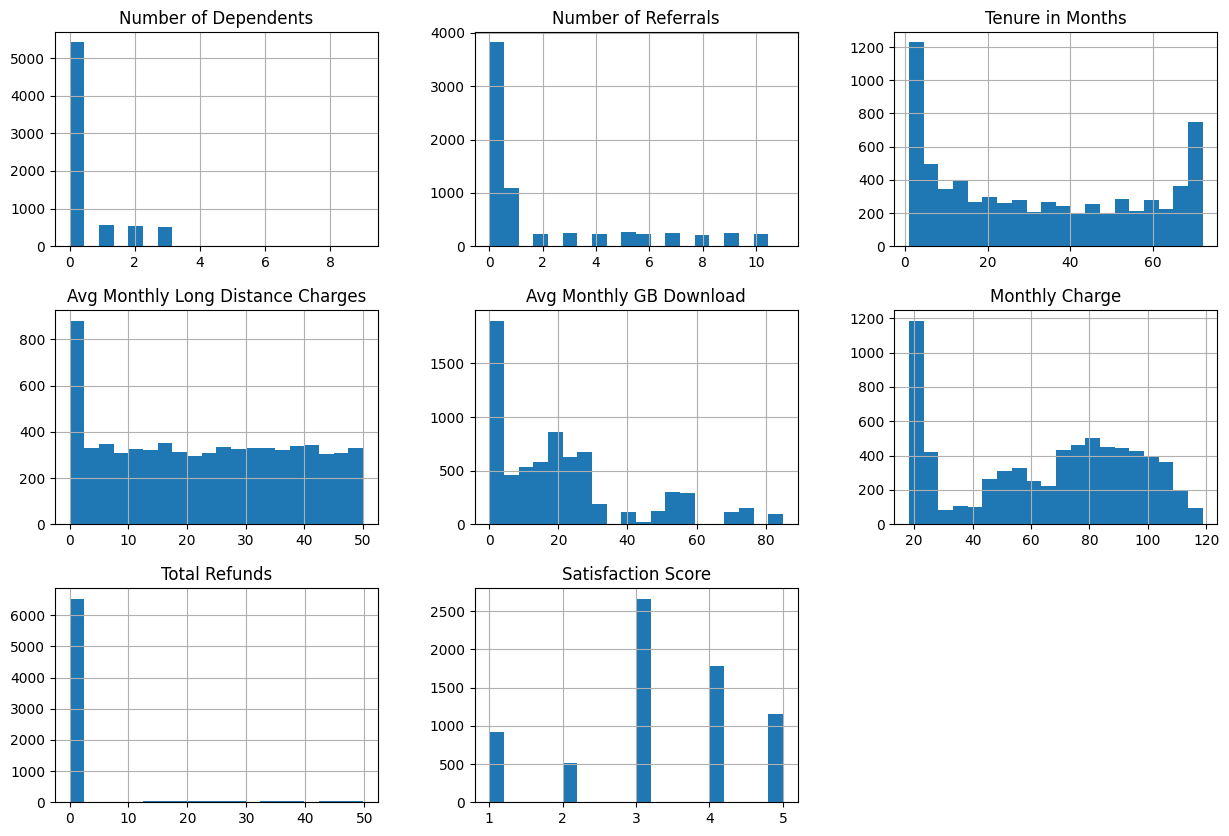

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data.hist(figsize=(15, 10), bins=20)
plt.show()

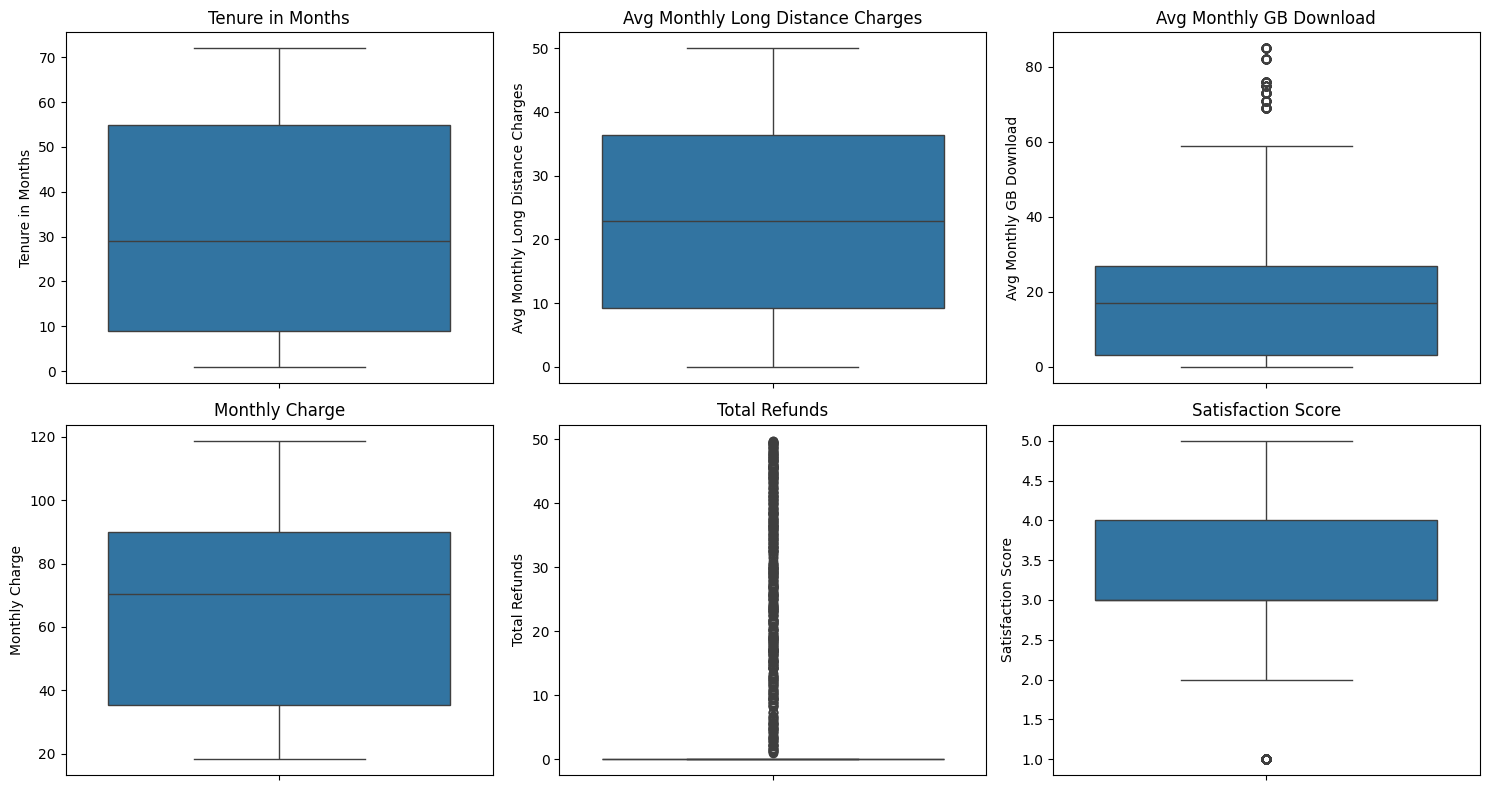

In [ ]:
num_cols = ['Tenure in Months', 'Avg Monthly Long Distance Charges',
            'Avg Monthly GB Download', 'Monthly Charge', 'Total Refunds', 'Satisfaction Score']

plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


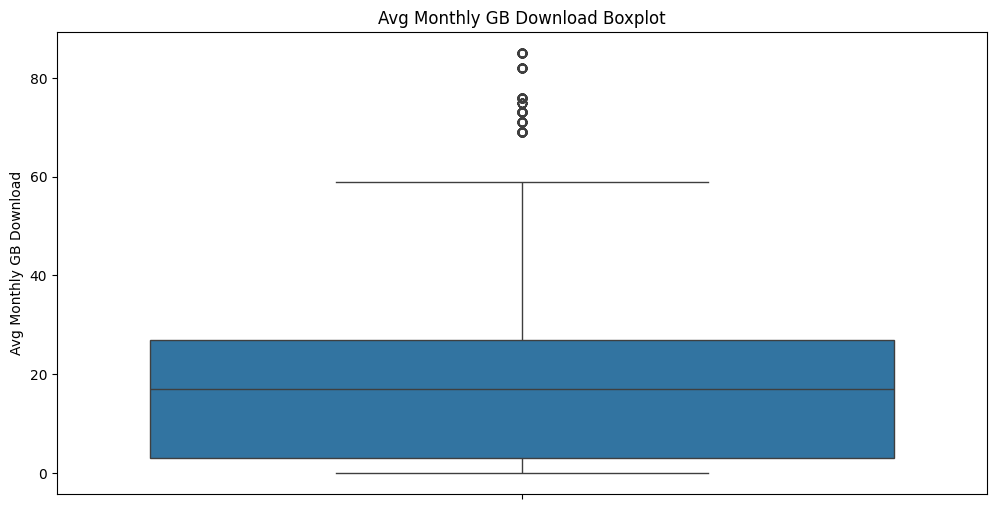

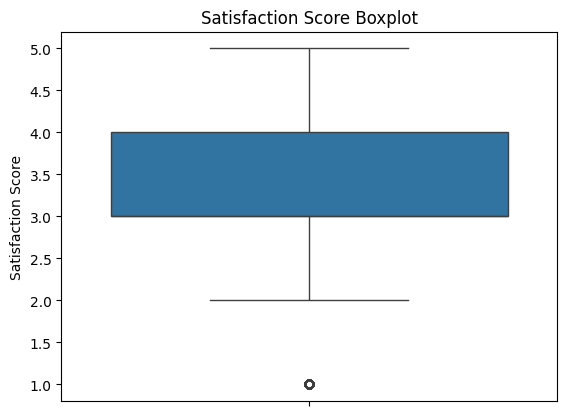

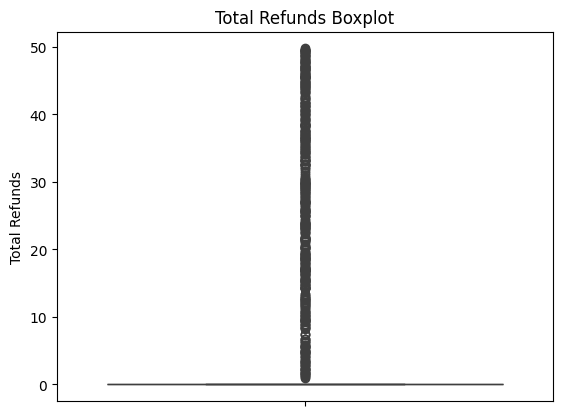

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data['Avg Monthly GB Download'])
plt.title("Avg Monthly GB Download Boxplot")
plt.show()

sns.boxplot(data['Satisfaction Score'])
plt.title("Satisfaction Score Boxplot")
plt.show()

sns.boxplot(data['Total Refunds'])
plt.title("Total Refunds Boxplot")
plt.show()


## Hapus Kolom yang tidak diperlukan

In [ ]:
data.drop(columns=['Customer ID', 'Birth Date', 'Country', 'Number of Dependents','City'], inplace=True)


## Menangani Missing Value

In [ ]:
data['Internet Type'].fillna(data['Internet Type'].mode()[0], inplace=True)

<ipython-input-1014-f998988e5047>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Internet Type'].fillna(data['Internet Type'].mode()[0], inplace=True)


## Meangani Outlier

In [ ]:

data['Avg Monthly GB Download'] = winsorize(data['Avg Monthly GB Download'], limits=[0, 0.05])


In [ ]:
data['Satisfaction Score'] =  winsorize(data['Satisfaction Score'], limits=[0.01, 0])

In [ ]:
data['Total Refunds'] = np.log1p(data['Total Refunds'])

In [ ]:
data_raw = data.copy()

# Preprocessing

## Encoding Kolom Kategorical

In [ ]:
categorical_columns = ['Gender', 'Married', 'Dependents',
            'Internet Service', 'Internet Type', 'Premium Tech Support',
            'Streaming Movies', 'Streaming Music', 'Contract', 'Paperless Billing', 'Payment Method']

label_enc = LabelEncoder()

for col in categorical_columns:
    data[col] = label_enc.fit_transform(data[col])


In [ ]:
data.head()

,Gender,Married,Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Internet Service,Internet Type,Avg Monthly GB Download,Premium Tech Support,Streaming Movies,Streaming Music,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Refunds,Satisfaction Score
0,1,0,0,0,1,0.00,1,1,8,0,1,0,0,1,0,39.65,0.000000,3
1,0,1,1,1,8,48.85,1,2,17,0,0,0,0,1,1,80.65,0.000000,3
2,1,0,1,0,18,11.33,1,2,52,0,1,1,0,1,0,95.45,3.841815,2
3,0,1,1,1,25,19.76,1,2,12,0,1,0,0,1,0,98.50,2.669309,2
4,0,1,1,1,37,6.33,1,2,14,0,0,0,0,1,0,76.50,0.000000,2


In [ ]:
data['Number of Referrals'].value_counts()

,count
Number of Referrals,
0,3821
1,1086
5,264
3,255
7,248
9,238
2,236
4,236
10,223


In [ ]:
data.head()

,Gender,Married,Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Internet Service,Internet Type,Avg Monthly GB Download,Premium Tech Support,Streaming Movies,Streaming Music,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Refunds,Satisfaction Score
0,1,0,0,0,1,0.00,1,1,8,0,1,0,0,1,0,39.65,0.000000,3
1,0,1,1,1,8,48.85,1,2,17,0,0,0,0,1,1,80.65,0.000000,3
2,1,0,1,0,18,11.33,1,2,52,0,1,1,0,1,0,95.45,3.841815,2
3,0,1,1,1,25,19.76,1,2,12,0,1,0,0,1,0,98.50,2.669309,2
4,0,1,1,1,37,6.33,1,2,14,0,0,0,0,1,0,76.50,0.000000,2


## Analisis PCA untuk Pemilihan Kolom

In [ ]:
from sklearn.decomposition import PCA
import numpy as np


pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)


pca_importance = pd.DataFrame({
    'Feature': data.columns,
    'PC1_Contribution': np.abs(pca.components_[0]),
    'PC2_Contribution': np.abs(pca.components_[1])
}).sort_values(by='PC1_Contribution', ascending=False)


display(pca_importance)


,Feature,PC1_Contribution,PC2_Contribution
15,Monthly Charge,0.876117,0.277371
4,Tenure in Months,0.359710,0.919002
8,Avg Monthly GB Download,0.313253,0.273672
5,Avg Monthly Long Distance Charges,0.066438,0.033181
3,Number of Referrals,0.010943,0.039151
10,Streaming Movies,0.009348,0.000046
6,Internet Service,0.009136,0.006387
11,Streaming Music,0.008162,0.000766
9,Premium Tech Support,0.005577,0.002776
17,Satisfaction Score,0.005200,0.015938


## Cek Korelasi

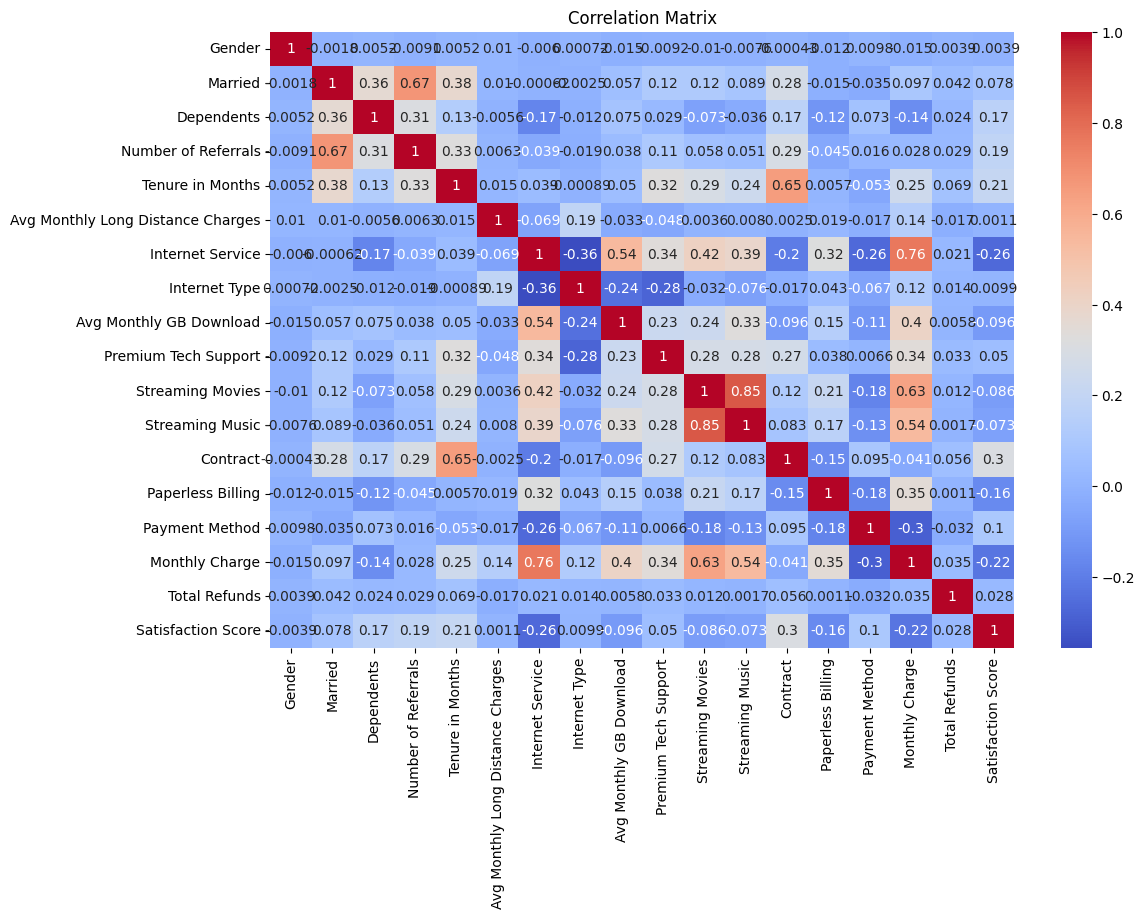

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


## Hapus Kolom dengan nilai kontribusi yang kecil

In [ ]:
data.drop(columns=['Streaming Movies',
    'Internet Service',
    'Streaming Music',
    'Premium Tech Support',
    'Payment Method',
    'Paperless Billing',
    'Internet Type',
    'Total Refunds',
    'Monthly Charge',
    'Gender',
    'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges'], inplace=True)


## Kolom Terpilih

In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = ['Tenure in Months', 'Number of Referrals', 'Satisfaction Score']
categorical_columns = ['Married', 'Contract', 'Dependents']


In [ ]:
data.head()

,Married,Dependents,Number of Referrals,Tenure in Months,Contract,Satisfaction Score
0,0,0,0,1,0,3
1,1,1,1,8,0,3
2,0,1,0,18,0,2
3,1,1,1,25,0,2
4,1,1,1,37,0,2


# Modelling K-Means & Eval Menggunakan Elbow Method

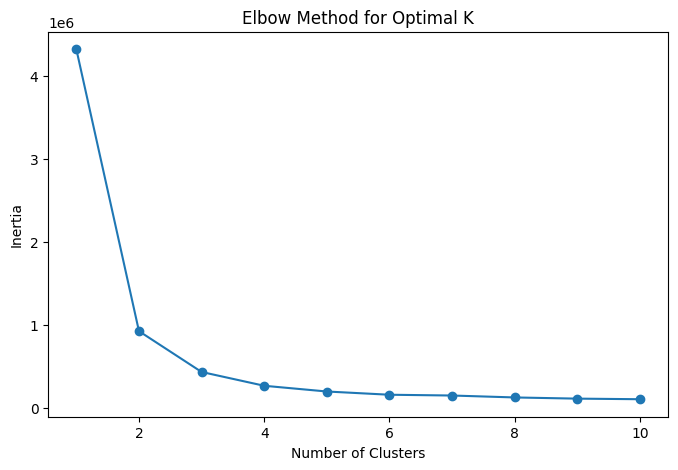

In [ ]:


inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


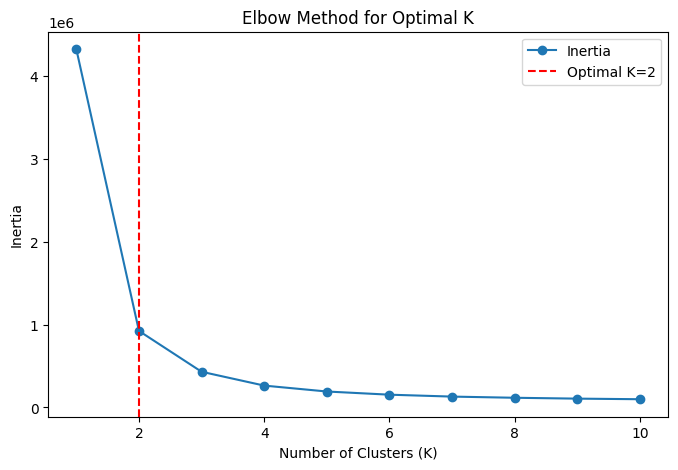

Rekomendasi nilai optimal K berdasarkan elbow method: 2


In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

K = range(1, 11)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

inertia_diff = np.diff(inertia)
optimal_k = K[np.argmin(inertia_diff) + 1]


plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o', linestyle='-', label='Inertia')
plt.axvline(x=optimal_k, linestyle='dashed', color='red', label=f'Optimal K={optimal_k}')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.legend()
plt.show()

print(f"Rekomendasi nilai optimal K berdasarkan elbow method: {optimal_k}")


In [ ]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data)


# Evaluasi Hasil Clustering

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Married              7043 non-null   int64
 1   Dependents           7043 non-null   int64
 2   Number of Referrals  7043 non-null   int64
 3   Tenure in Months     7043 non-null   int64
 4   Contract             7043 non-null   int64
 5   Satisfaction Score   7043 non-null   int64
 6   Cluster              7043 non-null   int32
dtypes: int32(1), int64(6)
memory usage: 357.8 KB


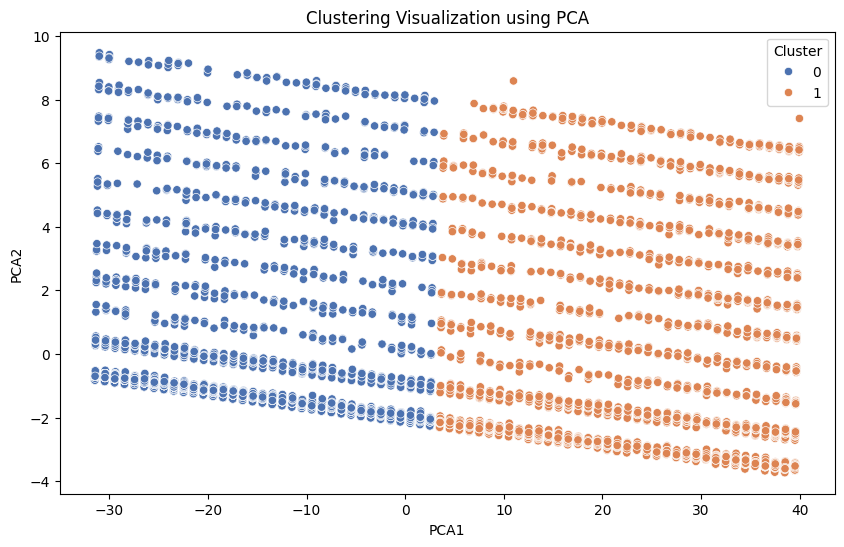

In [ ]:


pca = PCA(n_components=2)
pca_result = pca.fit_transform(data.drop(columns=['Cluster']))


pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = data['Cluster'].values


plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette="deep")
plt.title("Clustering Visualization using PCA")
plt.show()


## Silhouette Score

In [ ]:


score = silhouette_score(data.drop(columns=['Cluster']), data['Cluster'])
print(f"Silhouette Score: {score:.4f}")


Silhouette Score: 0.6558


## Davies-Bouldin Score

In [ ]:
from sklearn.metrics import davies_bouldin_score


db_score = davies_bouldin_score(data.drop(columns=['Cluster']), data['Cluster'])
print(f"Davies-Bouldin Score: {db_score}")


Davies-Bouldin Score: 0.4668828346136369


In [ ]:
cluster_summary = data.groupby('Cluster').mean()
display(cluster_summary)

,Married,Dependents,Number of Referrals,Tenure in Months,Contract,Satisfaction Score
Cluster,,,,,,
0,0.344940,0.191884,1.233968,13.198146,0.338677,3.067886
1,0.663717,0.282203,2.891183,57.493609,1.299246,3.476565


In [ ]:


print(tabulate(cluster_summary, headers='keys', tablefmt='pretty'))

+---------+---------------------+---------------------+---------------------+-------------------+---------------------+--------------------+
| Cluster |       Married       |     Dependents      | Number of Referrals | Tenure in Months  |      Contract       | Satisfaction Score |
+---------+---------------------+---------------------+---------------------+-------------------+---------------------+--------------------+
|    0    | 0.34493987975951906 | 0.19188376753507014 | 1.2339679358717435  | 13.19814629258517 | 0.33867735470941884 | 3.0678857715430863 |
|    1    | 0.6637168141592921  | 0.28220255653883974 |  2.891183218616847  | 57.49360865290069 | 1.2992461488036708  | 3.476565060635857  |
+---------+---------------------+---------------------+---------------------+-------------------+---------------------+--------------------+


In [ ]:
data.head()

,Married,Dependents,Number of Referrals,Tenure in Months,Contract,Satisfaction Score,Cluster
0,0,0,0,1,0,3,0
1,1,1,1,8,0,3,0
2,0,1,0,18,0,2,0
3,1,1,1,25,0,2,0
4,1,1,1,37,0,2,1


In [ ]:

print("Jumlah baris data awal:", len(data_raw))
print("Jumlah baris data setelah clustering:", len(data))

data_raw["Cluster"] = data["Cluster"]


Jumlah baris data awal: 7043
Jumlah baris data setelah clustering: 7043


# Visualisasi Cluster

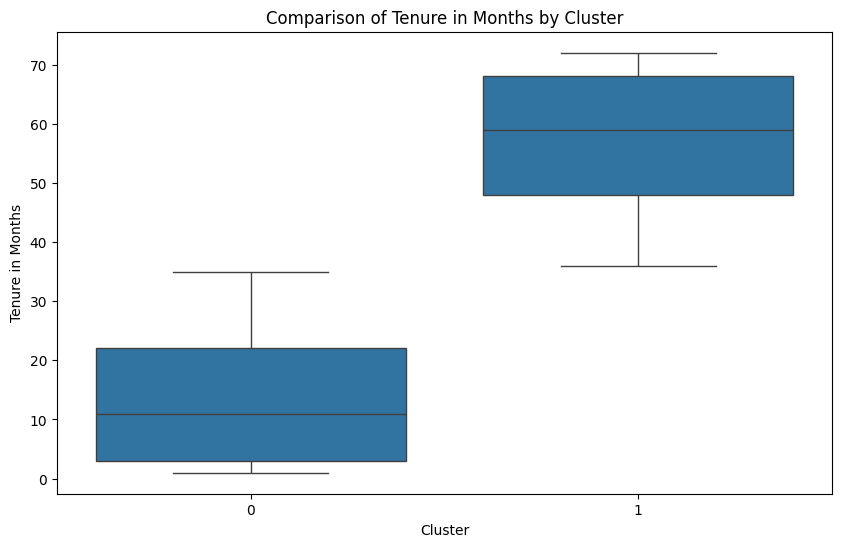

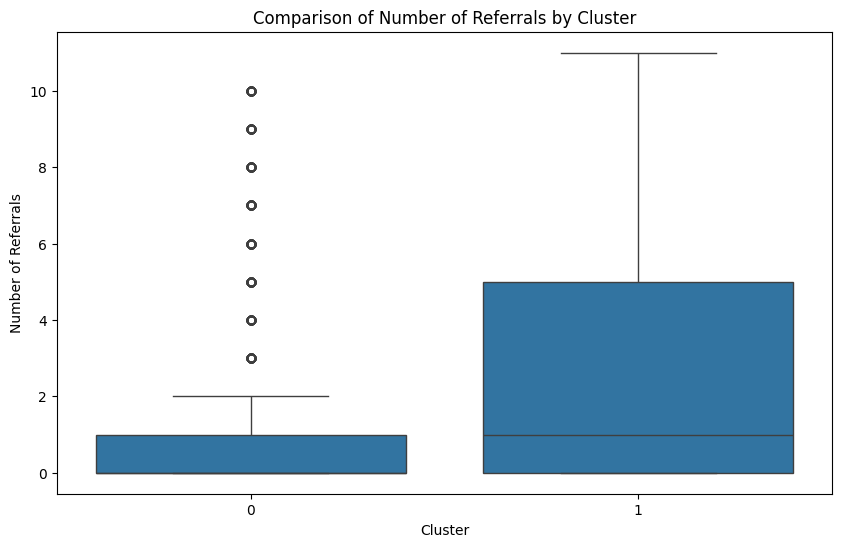

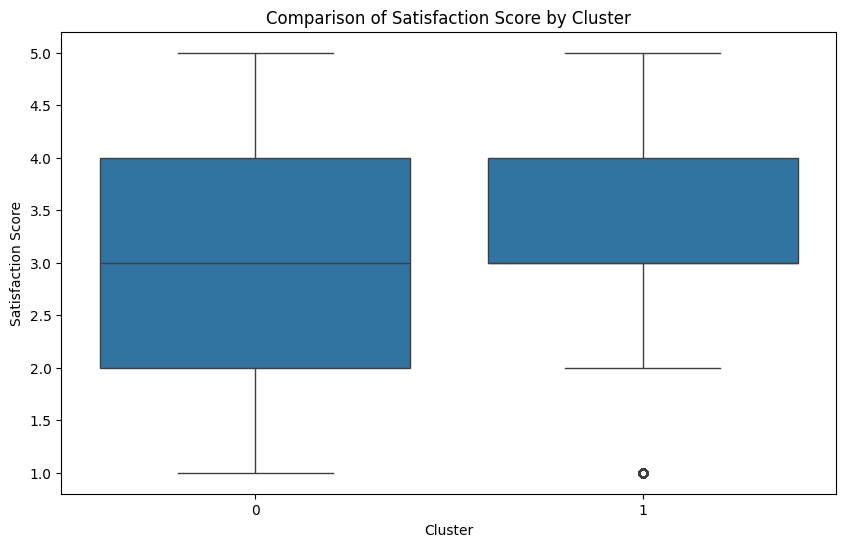

In [ ]:


for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=col, data=data_raw)
    plt.title(f"Comparison of {col} by Cluster")
    plt.show()



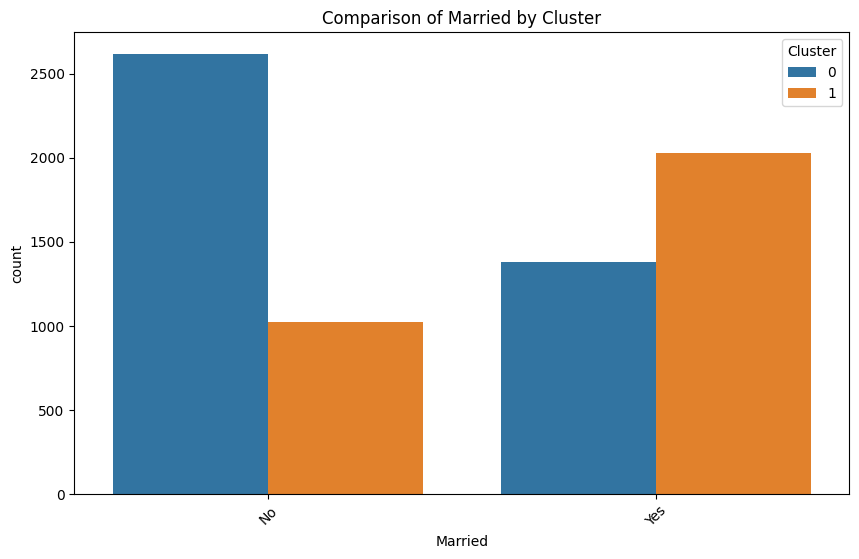

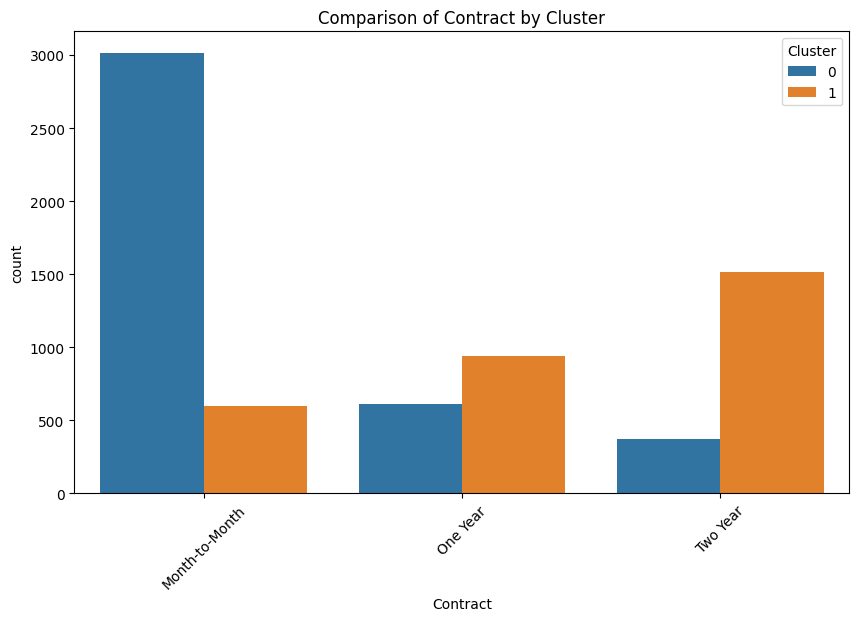

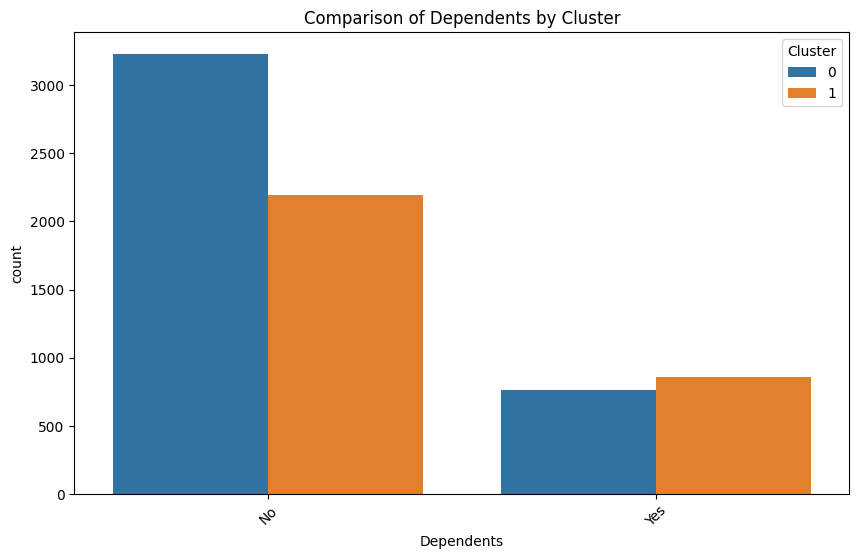

In [ ]:

for col in categorical_columns :
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Cluster', data=data_raw)
    plt.title(f"Comparison of {col} by Cluster")
    plt.xticks(rotation=45)
    plt.show()
